# Première implementation des modèles

Ce notebook est fait pour faire des tests sur l'implémentation des modèles, de la génération des données, des graphiques, etc.

In [2]:
%load_ext autoreload
%autoreload 2

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nprd
import pandas as pd

from smc_movement_models.plots import plot_graph_values

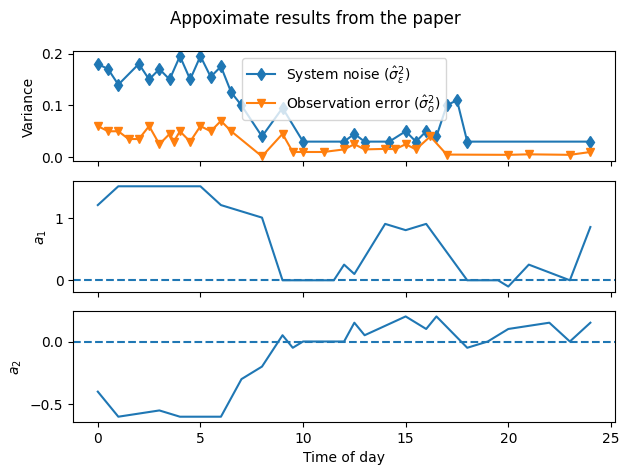

In [15]:
gv_fig = plot_graph_values(figsize=None)

In [108]:
df = pd.read_csv("data/4121_filtervelocity_PostThesis.csv")
df["Dtime"] = pd.to_datetime(df["Dtime"])
df["Depth_Diff"] = df["Calib_Depth"] - df["Orig_Depth"]
df["Depth"] = -df["Velocity"].cumsum() * 5
df["Cumulative_Sum_Diff"] = -df["Depth"] - df["Calib_Depth"]

In [109]:
nan_sum = lambda x: x.isnull().sum()

summary = df.groupby("Date").agg(
    Min_Time=pd.NamedAgg(column="Dtime", aggfunc="min"),
    Max_Time=pd.NamedAgg(column="Dtime", aggfunc="max"),
    Calib_Depth_NaNs=pd.NamedAgg(column="Calib_Depth", aggfunc=nan_sum),
    Orig_Depth_NaNs=pd.NamedAgg(column="Orig_Depth", aggfunc=nan_sum),
    Velocity_NaNs=pd.NamedAgg(column="Velocity", aggfunc=nan_sum),
    Observations=pd.NamedAgg(column="Velocity", aggfunc="count"),
)

summary

,Min_Time,Max_Time,Calib_Depth_NaNs,Orig_Depth_NaNs,Velocity_NaNs,Observations
Date,,,,,,
14/01/2008,2008-01-14 08:37:15,2008-01-14 23:59:55,570,570,0,11073
15/01/2008,2008-01-15 00:00:00,2008-01-15 23:59:55,994,994,0,17280
16/01/2008,2008-01-16 00:00:00,2008-01-16 23:59:55,1321,1321,0,17280
17/01/2008,2008-01-17 00:00:00,2008-01-17 23:59:55,1046,1046,0,17280
18/01/2008,2008-01-18 00:00:00,2008-01-18 23:59:55,866,866,0,17280
19/01/2008,2008-01-19 00:00:00,2008-01-19 23:59:55,3638,3638,0,17280
20/01/2008,2008-01-20 00:00:00,2008-01-20 23:59:55,17280,17280,0,17280
21/01/2008,2008-01-21 00:00:00,2008-01-21 23:59:55,17280,17280,0,17280
22/01/2008,2008-01-22 00:00:00,2008-01-22 23:59:55,17280,17280,0,17280


In [110]:
mask_day = df["Date"] == "19/01/2008"

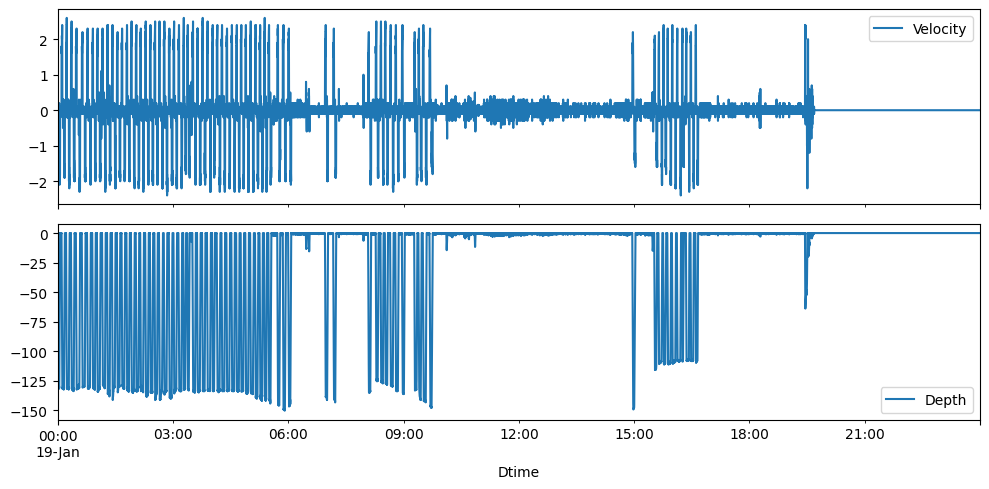

In [111]:
mask_day = df["Date"] == "19/01/2008"

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 5))

df[mask_day].plot(x="Dtime", y="Velocity", ax=axs[0])
df[mask_day].plot(x="Dtime", y="Depth", ax=axs[1])
# df[mask_day].plot(x="Dtime", y="Orig_Depth", ax=axs[2])
# df[mask_day].plot(x="Dtime", y="Cumulative_Sum", ax=axs[3])
# df[mask_day].plot(x="Dtime", y="Depth_Diff", ax=axs[4])
# df[mask_day].plot(x="Dtime", y="Calib_Depth", ax=axs[5])

fig.tight_layout()

In [115]:
day = df.loc[mask_day, ["Dtime", "Velocity", "Depth"]]

In [116]:
df.to_csv("data/clean_data.csv", index=False)
day.to_csv("data/19_01_2008.csv", index=False)